In [1]:
import sys
print sys.prefix
print sys.version
spark_home = "C:\spark152"
db_path = "D:/tmp/IPYNBv2/eds"
# spark_home = "/opt/mapr/spark/spark-1.6.1"
# db_path = "/user/mapr/eds"

c:\anaconda2\envs\mypy
2.7.12 |Continuum Analytics, Inc.| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import re
import drill_utilities as du
%matplotlib inline

In [3]:
#
# Drillbit ODBC connection
#
conn = du.DrillODBC("drill_eds")

In [4]:
#
# Select all values per voi
#
q = "select PARENT as SAPS2_VARIABLE, LID as SAPS2_INTERVAL, saps2weight, index from \
IGS2_ref_feature_categories order by PARENT, index"
df_categories = conn.df_from_query(q)
df_categories.head()

,SAPS2_VARIABLE,SAPS2_INTERVAL,saps2weight,index
0,AGE,<40,0,1
1,AGE,40-59,7,3
2,AGE,60-69,12,4
3,AGE,70-74,15,5
4,AGE,75-79,16,6


In [5]:
df_categories['SEQ'] = np.zeros(len(df_categories)).astype(int)
l_var = list(df_categories['SAPS2_VARIABLE'].unique())

for i, v in enumerate(l_var):
    df = df_categories[df_categories['SAPS2_VARIABLE'] == v]
    df_categories.at[df.index, 'SEQ'] = np.arange(1, len(df)+1).astype(int)

# df_categories

In [6]:
# df_categories['SEQ'].apply(lambda x: '{0:02d}'.format(x))

In [7]:
df_categories['SAPS2_INTERVAL'] = df_categories['SEQ'].apply(lambda x: '{0:02d}'.format(x)).str.cat(df_categories['SAPS2_INTERVAL'], sep='__')
df_categories['SAPS2_INTERVAL'] = df_categories['SAPS2_VARIABLE'].str.cat(df_categories['SAPS2_INTERVAL'])
# df_categories['saps2weight'] = df_categories['saps2weight'].astype(int)
df = df_categories.pivot(index='SAPS2_INTERVAL', columns='SAPS2_VARIABLE', values='saps2weight')
# df = df_categories.pivot(index='SAPS2_VARIABLE', columns='saps2weight', values='SAPS2_INTERVAL')
df.fillna(0)
print

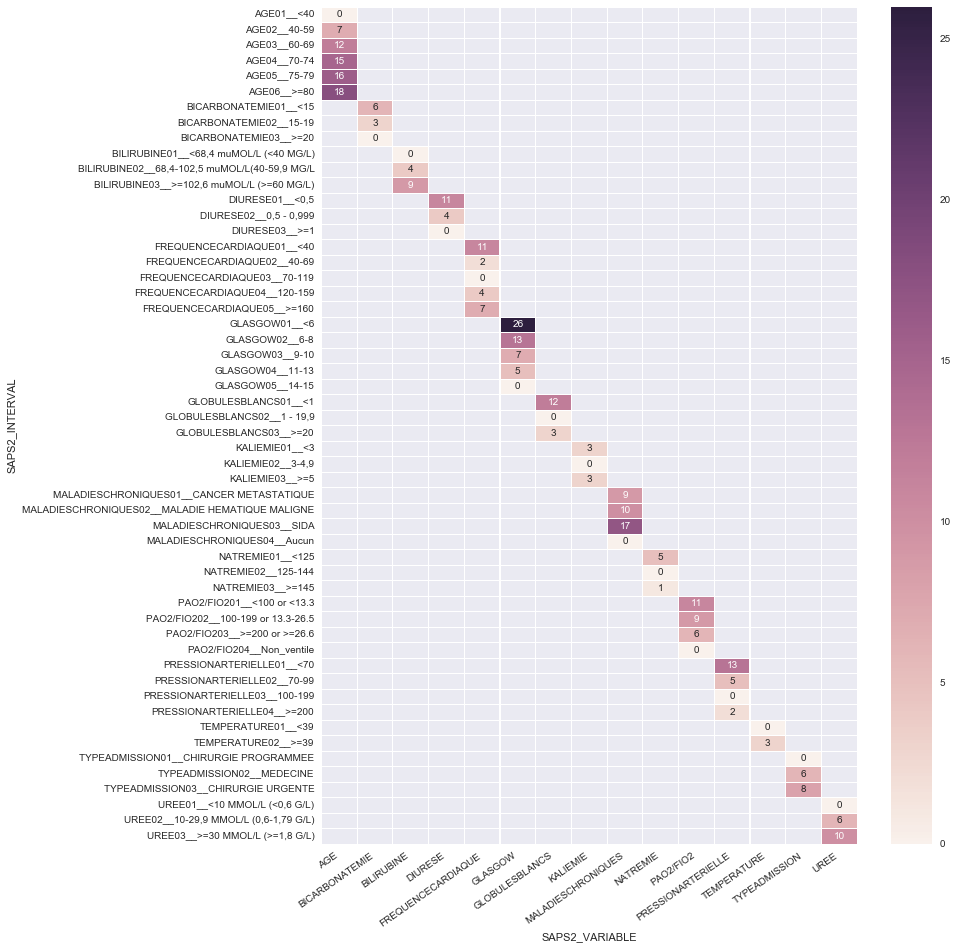

In [8]:
f = plt.figure(figsize=(12, 15))
# print(df.dtypes)
sns.heatmap(df, annot=True, linewidth=0.1);
plt.setp(f.axes[0].xaxis.get_majorticklabels(), rotation=35, ha='right');

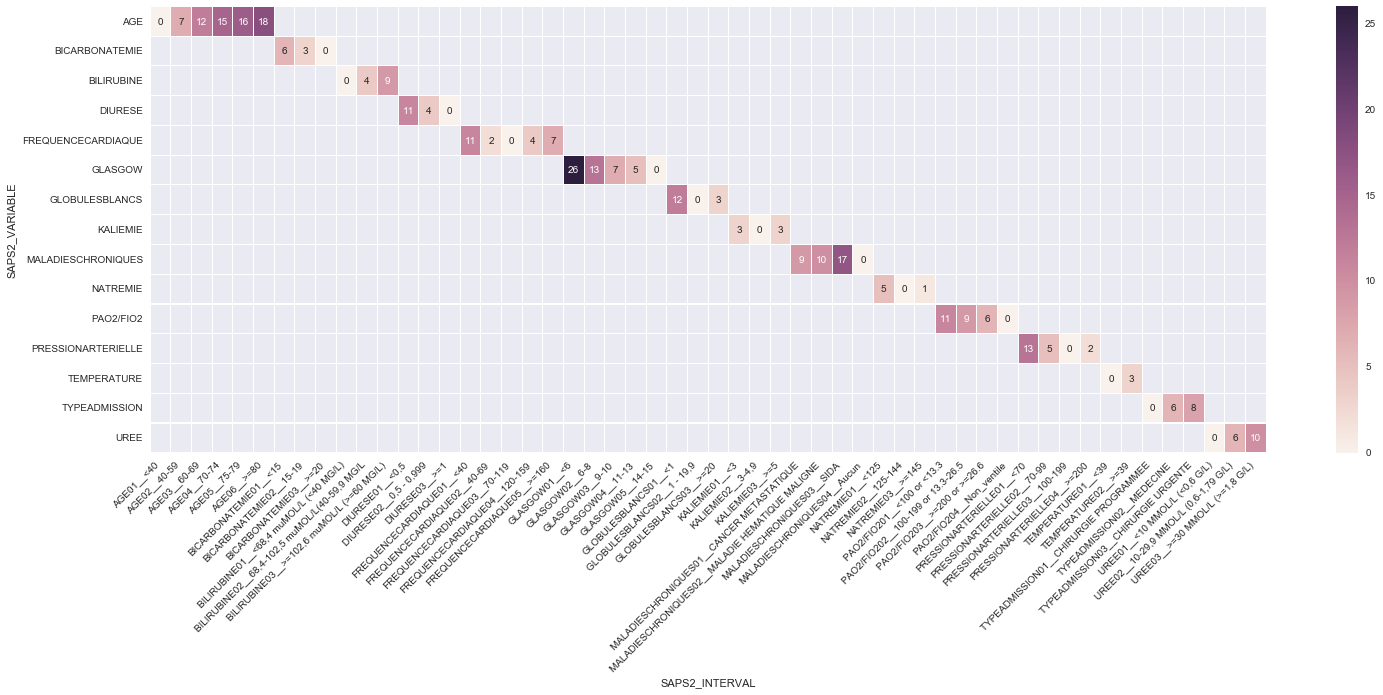

In [13]:
f = plt.figure(figsize=(25, 8))
# print(df.dtypes)
sns.heatmap(df.transpose(), annot=True, linewidth=0.1);
plt.setp(f.axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right');